
# Simple ANN for Binary Classification

This notebook demonstrates how to build, train, and evaluate a simple Artificial Neural Network (ANN) for a binary classification problem using the Keras library in TensorFlow. We will use the `make_moons` dataset from `sklearn` for this purpose.
    

In [1]:

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam



## Step 1: Generate and Visualize the Dataset

The `make_moons` function creates a simple toy dataset that is suitable for demonstrating binary classification problems with non-linear decision boundaries.
    

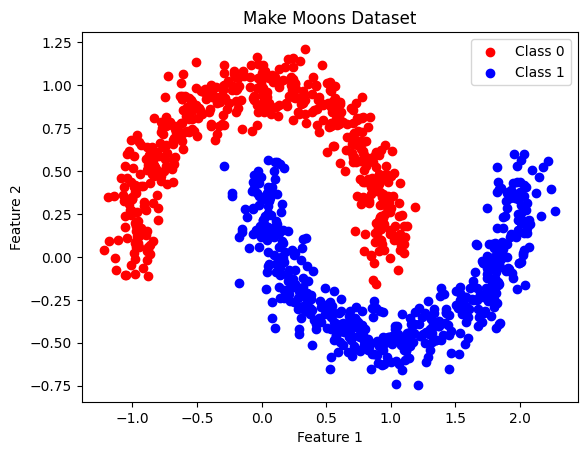

In [2]:

# Generate the dataset
X, y = make_moons(n_samples=1000, noise=0.1, random_state=42)

# Visualize the dataset
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
plt.title('Make Moons Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()



## Step 2: Preprocess the Data

Split the dataset into training and testing sets to evaluate the performance of our model on unseen data.
    

In [3]:

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



## Step 3: Build the ANN Model

We will build a simple ANN model with one input layer, one hidden layer, and one output layer. The model will use ReLU activation functions for the non-output layers and a sigmoid activation function for the output layer to perform binary classification.
    

In [4]:

# Define the model
model = Sequential([
    Dense(10, input_dim=2, activation='relu'),  # Input layer
    Dense(10, activation='relu'),  # Hidden layer
    Dense(1, activation='sigmoid')  # Output layer
])



## Step 4: Compile the Model

Compile the model with the Adam optimizer, binary cross-entropy loss function, and accuracy as the metric.
    

In [5]:

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])



## Step 5: Train the Model

Train the model on the training data and validate it using a portion of the training data to monitor its performance during training.
    

In [6]:

# Train the model
history = model.fit(X_train, y_train, epochs=100, verbose=1, validation_split=0.2)


Epoch 1/100
20/20 [==============================] - 1s 8ms/step - loss: 0.5246 - accuracy: 0.7781 - val_loss: 0.4000 - val_accuracy: 0.8250
Epoch 2/100
20/20 [==============================] - 0s 3ms/step - loss: 0.3221 - accuracy: 0.8578 - val_loss: 0.2840 - val_accuracy: 0.8813
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.2677 - accuracy: 0.8781 - val_loss: 0.2525 - val_accuracy: 0.8750
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 0.2518 - accuracy: 0.8750 - val_loss: 0.2345 - val_accuracy: 0.8625
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.2362 - accuracy: 0.8859 - val_loss: 0.2201 - val_accuracy: 0.9000
Epoch 6/100
20/20 [==============================] - 0s 3ms/step - loss: 0.2160 - accuracy: 0.9016 - val_loss: 0.2267 - val_accuracy: 0.9125
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.2147 - accuracy: 0.9016 - val_loss: 0.2029 - val_accuracy: 0.9187
Epoch 8/100
2


## Step 6: Evaluate the Model

After training, evaluate the model's performance on the test set.
    

In [7]:

# Evaluate the model
evaluation = model.evaluate(X_test, y_test, verbose=1)
print(f'Test Loss: {evaluation[0]}, Test Accuracy: {evaluation[1]}')


7/7 [==============================] - 0s 1ms/step - loss: 2.4737e-04 - accuracy: 1.0000
Test Loss: 0.00024736757040955126, Test Accuracy: 1.0



## Optional: Plot Training History

Plot the accuracy over the epochs for both the training and validation sets to visualize the learning process.
    

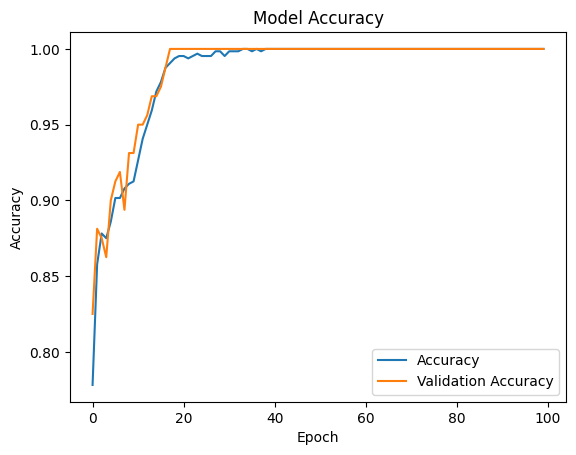

In [8]:

# Plot training history
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()
